In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [153]:
df = pd.read_csv(r"data\car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [154]:
df = df.drop(columns =["Car_Name"])

In [155]:
numeric_cols = ['Present_Price','Driven_kms']

In [156]:
df.duplicated().sum()

2

In [157]:
df.drop_duplicates(inplace=True) # There are duplicates in the datset. 

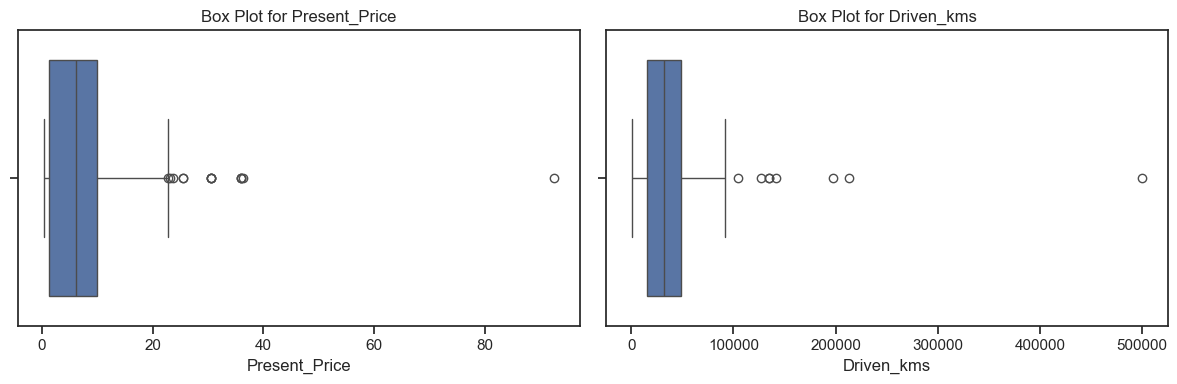

In [158]:
sns.set(style='ticks')
fig, axes = plt.subplots(1, 2, figsize=(12,4))

for i, j in enumerate(numeric_cols):
    sns.boxplot(x=df[j], ax=axes[i])
    axes[i].set_title(f'Box Plot for {j}')

plt.tight_layout()
plt.show()

In [159]:
df.shape

(299, 8)

In [160]:
X = df.drop(columns=["Selling_Price"])
y= df['Selling_Price']

In [161]:
le = LabelEncoder()

In [162]:
cat_cols = df.select_dtypes(include=["object"])

In [163]:
for i in cat_cols:
    X[i] = le.fit_transform(X[i])

In [164]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [165]:
ss =StandardScaler()

In [166]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [168]:
models = [
    ["Linear Regression", LinearRegression()],
    ["Random Forest Regressor", RandomForestRegressor(n_jobs=-1,random_state=42)],
    ["Gradient Boosting Regressor", GradientBoostingRegressor(random_state=42)],
    ["XGBoost Regressor", XGBRegressor(n_jobs=-1,random_state=42)]
]

results = []

for name, model in models:
    model.fit(X_train_scaled, y_train)

    r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=KFold(n_splits=3, shuffle=True, random_state=42), n_jobs=-1, scoring='r2')
    mean_r2 = r2_scores.mean()

    # Cross-Validated Mean Squared Error (MSE)
    mse_scores = -cross_val_score(model, X_train_scaled, y_train, cv=KFold(n_splits=3, shuffle=True, random_state=42), n_jobs=-1, scoring='neg_mean_squared_error')
    mean_mse = mse_scores.mean()

    mae_scores = -cross_val_score(model, X_train_scaled, y_train, cv=KFold(n_splits=3, shuffle=True, random_state=42), n_jobs=-1, scoring='neg_mean_absolute_error')
    mean_mae = mae_scores.mean()

    # Test the model
    y_pred = model.predict(X_test_scaled)

    # Test R-squared (R²) score
    test_r2 = r2_score(y_test, y_pred)

    # Test Mean Squared Error (MSE)
    test_mse = mean_squared_error(y_test, y_pred)

    # Test Root Mean Absolute Error (MAE)
    test_mae = mean_absolute_error(y_test, y_pred)

    results.append([name, round(mean_r2.mean(), 2), round(mean_mse.mean(), 2), round(mean_mae.mean(), 2),
                    round(test_r2, 2), round(test_mse, 2), round(test_mae, 2)]) # type: ignore

In [171]:
results_df = pd.DataFrame(results, columns=["Model", "CV R2", "Mean MSE", "Mean MAE",
                                            "Test R2", "Test MSE", "Test MAE"]
                          
                        ).sort_values(by="Test R2", ascending=False)
results_df

,Model,CV R2,Mean MSE,Mean MAE,Test R2,Test MSE,Test MAE
3,XGBoost Regressor,0.84,4.24,0.73,0.79,5.32,1.09
0,Linear Regression,0.87,3.26,1.11,0.74,6.68,1.54
2,Gradient Boosting Regressor,0.87,3.67,0.70,0.69,8.05,1.23
1,Random Forest Regressor,0.86,3.56,0.75,0.58,10.88,1.40


In [ ]:
data = {
    'Model': ['Random Forest Regressor', 'Random Forest Regressor_after dropping duplicates'],
    'CV R2': [0.82, 0.86],
    'Mean MSE': [4.45, 3.52],
    'Mean RMSE': [1.94, 1.78],
    'Test R2': [0.96, 0.58],
    'Test MSE': [0.85, 10.88],
    'Test RMSE': [0.92, 3.3]
}

df_1 = pd.DataFrame(data)
df_1

,Model,CV R2,Mean MSE,Mean RMSE,Test R2,Test MSE,Test RMSE
0,Random Forest Regressor,0.82,4.45,1.94,0.96,0.85,0.92
1,Random Forest Regressor_after dropping duplicates,0.86,3.52,1.78,0.58,10.88,3.30
